# Bibliotecas


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# NumPy

NumPy é usada principalmente para realizar cálculos em Arrays Multidimensionais. O NumPy fornece um grande conjunto de funções e operações de biblioteca que ajudam os programadores a executar facilmente cálculos numéricos (MEDIUM, 2018).

# Pandas

A biblioteca Pandas é utilizada para análise de dados. O Pandas vem com um conjunto de opções e configurações alteráveis pelo usuário. Eles podem aumentar muito a produtividade, pois permitem que você personalize o ambiente do Pandas exatamente de acordo com suas preferências. EX: alterar algumas das configurações de exibição do Pandas para alterar quantas linhas e colunas são mostradas e com que precisão os números de ponto flutuante são exibidos (VOITTO, 2021)

# Matplotlib

Matplotlib é uma biblioteca para criação de gráficos e visualização de dados em geral e foi feita para a linguagem de programação Python. Além disso, ele oferece uma interface de programação orientada a objetos para incluir gráficos através de toolkits de interface gráfica como o Tkinter, Wxpython, Qt ou GTK (MEDIUM, 2020).

# Seaborn

A biblioteca Seaborn trabalha em cima do matplotlib e ajuda a melhorar o visual dos gráficos, dando uma aparência mais bem acabada (VOOOO, 2017).

# Importando dados

In [ ]:
dados_morte_idade = pd.read_csv('/content/cancer-death-rates-by-age.csv')

# Filtrando dados "Brasil"

In [ ]:
#pegando os dados do brasil
list(dados_morte_idade['Entity'].drop_duplicates())
brasil_l1 = ['Brazil']
selecao_l1 = dados_morte_idade['Entity'].isin(brasil_l1)
dados_brasil_mortes = dados_morte_idade[selecao_l1]
dados_brasil_mortes = dados_brasil_mortes.drop(columns=['Code', 'Entity', 'Year'])
dados_brasil_mortes = dados_brasil_mortes.drop(columns=['Deaths - Neoplasms - Sex: Both - Age: Age-standardized (Rate)'])
dados_brasil_mortes = dados_brasil_mortes.drop(columns=['Deaths - Neoplasms - Sex: Both - Age: All Ages (Rate)'])
dados_brasil_mortes = dados_brasil_mortes.round(1)
dados_brasil_mortes = dados_brasil_mortes.iloc[23:28]
dados_brasil_mortes = dados_brasil_mortes.reset_index()
dados_brasil_mortes = dados_brasil_mortes.drop(columns=['index'])

#Traduzindo o dataframe

In [ ]:
renomear_l1 = {
       'Deaths - Neoplasms - Sex: Both - Age: Under 5 (Rate)': 'Abaixo de 5 anos',
       'Deaths - Neoplasms - Sex: Both - Age: 70+ years (Rate)': 'Acima de 70 anos',
       'Deaths - Neoplasms - Sex: Both - Age: 5-14 years (Rate)': 'Entre 5-14 anos',
       'Deaths - Neoplasms - Sex: Both - Age: 50-69 years (Rate)': 'Entre 50-69 anos',
       'Deaths - Neoplasms - Sex: Both - Age: 15-49 years (Rate)': 'Entre 15-49 anos'
}
dados_brasil_mortes = dados_brasil_mortes.rename(columns = renomear_l1)

#Importando os dados dos casos


In [ ]:
dados_numero_de_pessoas = pd.read_csv('/content/number-of-people-with-cancer-by-age.csv')

# Selecionando dados do Brasil

In [ ]:
list(dados_numero_de_pessoas['Entity'].drop_duplicates())
brasil_l2 = ['Brazil']
selecao_l2 = dados_numero_de_pessoas['Entity'].isin(brasil_l2)
dados_brasil_casos = dados_numero_de_pessoas[selecao_l2]
dados_brasil_casos = dados_brasil_casos.drop(columns=['Code', 'Entity', 'Year'])
dados_brasil_casos = dados_brasil_casos.round(1)
dados_brasil_casos = dados_brasil_casos[23:]
dados_brasil_casos = dados_brasil_casos.reset_index()
dados_brasil_casos = dados_brasil_casos.drop(columns=['index'])

# Traduzindo o dataframe


In [ ]:
renomear_l2 = {
       'Prevalence - Neoplasms - Sex: Both - Age: 70+ years (Number)': 'Acima de 70 anos',
       'Prevalence - Neoplasms - Sex: Both - Age: 50-69 years (Number)': 'Entre 50-69 anos',
       'Prevalence - Neoplasms - Sex: Both - Age: 15-49 years (Number)': 'Entre 15-49 anos',
       'Prevalence - Neoplasms - Sex: Both - Age: 5-14 years (Number)': 'Entre 5-14 anos',
       'Prevalence - Neoplasms - Sex: Both - Age: Under 5 (Number)':'Abaixo de 5 anos'
}
dados_brasil_casos = dados_brasil_casos.rename(columns = renomear_l2)

# Valores utilizados na análise e variáveis

In [ ]:
#pegando valores que iremos utilizar na análise e criando variáveis
descricao_um = dados_brasil_casos['Abaixo de 5 anos'].describe()
descricao_dois = dados_brasil_casos['Entre 5-14 anos'].describe()
descricao_tres = dados_brasil_casos['Entre 15-49 anos'].describe()
descricao_quatro = dados_brasil_casos['Entre 50-69 anos'].describe()
descricao_cinco = dados_brasil_casos['Acima de 70 anos'].describe()

idade = ['Abaixo de 5 anos', 'Entre 5-14 anos', 'Entre 15-49 anos', 'Entre 50-69 anos', 'Acima de 70 anos']

anos = [2013, 2014, 2015, 2016, 2017]

#criando funções para criar os gráficos
def numero_em_cima(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

def monta_grafico(valores_mortes, valores_casos, titulo):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  fig, ax = plt.subplots(figsize=(12, 6))

  width = 0.25
  r1 = np.arange(5)
  r2 = [ x + width for x in r1]

  rects1 = ax.bar(r1, dados['valores_casos'], width, label='CASOS')
  rects2 = ax.bar(r2, dados['valores_mortes'], width, label='MORTES')

  ax.set_title(titulo)
  ax.set_xticks(r2)
  ax.set_xticklabels(idade)
  ax.legend()

  numero_em_cima(rects1, ax)
  numero_em_cima(rects2, ax)

  plt.show()

# Gráficos comparando mortes e casos no período 2013-2017

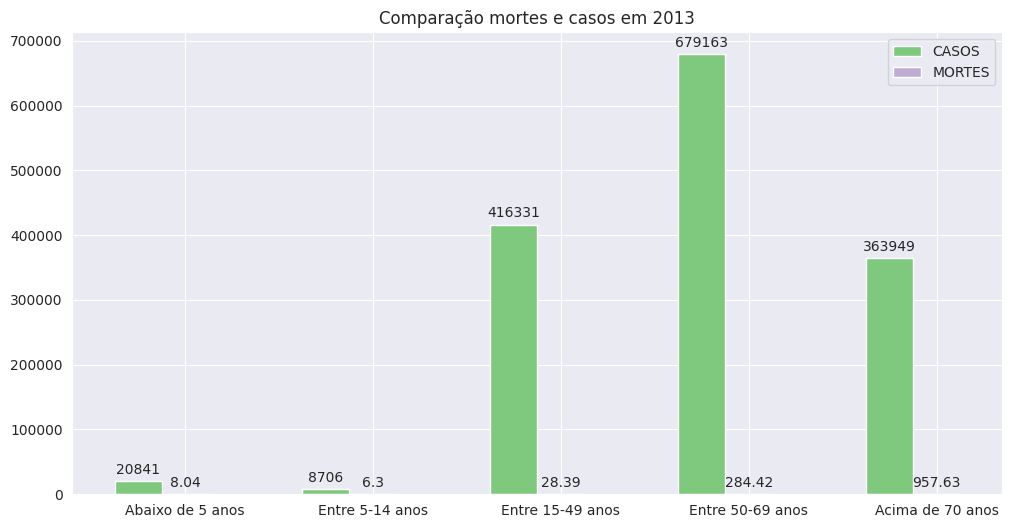

In [ ]:
dados = {'valores_mortes': (8.04, 6.30, 28.39, 284.42, 957.63),
              'valores_casos': (20841, 8706, 416331, 679163, 363949)}

monta_grafico(dados['valores_mortes'], dados['valores_casos'], 'Comparação mortes e casos em 2013')

No ano de 2013, verificou-se que a faixa etária acima de 70 anos concentrou o maior número de casos e óbitos, representando 26% do total. Por outro lado, o grupo composto por pessoas de 15 a 49 anos apresentou a menor taxa de mortalidade, com apenas 1% dos óbitos, destacando-se por uma tendência oposta.

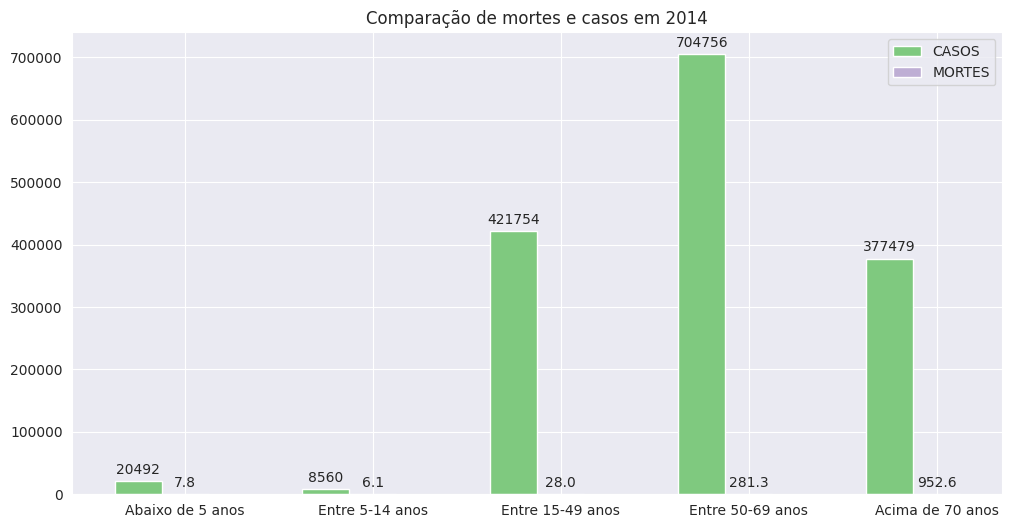

In [ ]:
dados = {'valores_mortes': (7.8, 6.1, 28.0, 281.3, 952.6),
              'valores_casos': (20492, 8560, 421754, 704756, 377479)}

monta_grafico(dados['valores_mortes'], dados['valores_casos'], 'Comparação de mortes e casos em 2014')

Em 2014, constatou-se que o grupo de indivíduos com idade superior a 70 anos apresentou a maior incidência de casos e óbitos, correspondendo a 25% do total. No entanto, em comparação com o ano anterior, houve uma redução de 1% na proporção dessa faixa etária. Por outro lado, o grupo composto por pessoas entre 15 e 49 anos registrou a menor taxa de mortalidade, representando apenas 1% dos óbitos. Esses dados evidenciam a importância de acompanhar as mudanças nas faixas etárias afetadas e adaptar as estratégias de cuidado e prevenção de acordo com as tendências observadas.

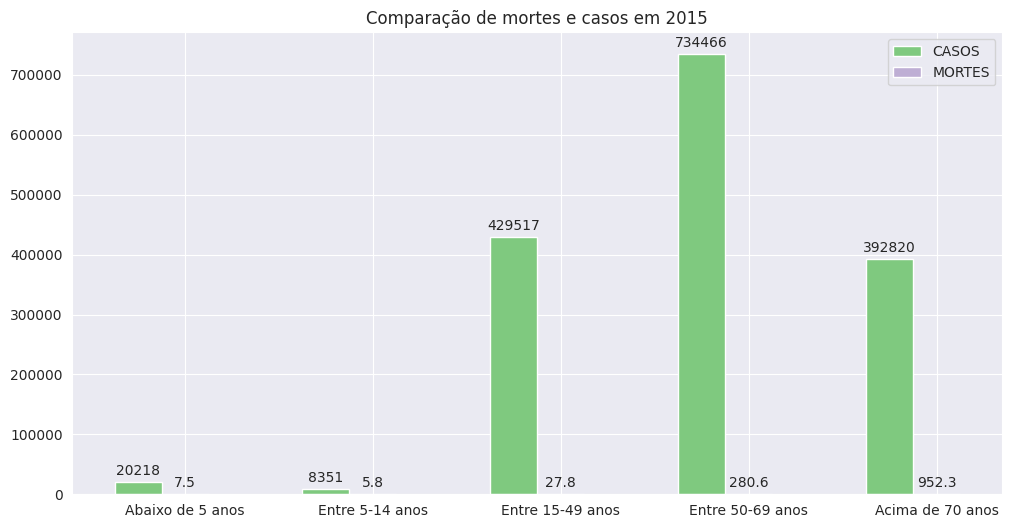

In [ ]:
dados = {'valores_mortes': (7.5, 5.8, 27.8, 280.6, 952.3),
              'valores_casos': (20218, 8351, 429517, 734466, 392820)}

monta_grafico(dados['valores_mortes'], dados['valores_casos'], 'Comparação de mortes e casos em 2015')

No período de 2015, observou-se que a faixa etária acima de 70 anos registrou o maior índice de casos e óbitos, correspondendo a 24% do total. Em relação ao ano anterior, constatou-se uma queda de 1% na proporção dessa faixa etária. Em contrapartida, o grupo composto por pessoas entre 15 e 49 anos apresentou a menor taxa de mortalidade, representando apenas 1% dos falecimentos. Esses resultados destacam uma discrepância significativa entre os diferentes grupos etários no que diz respeito à incidência e gravidade dos casos, evidenciando a importância de monitorar as variações ao longo do tempo para direcionar estratégias adequadas de prevenção e cuidado.

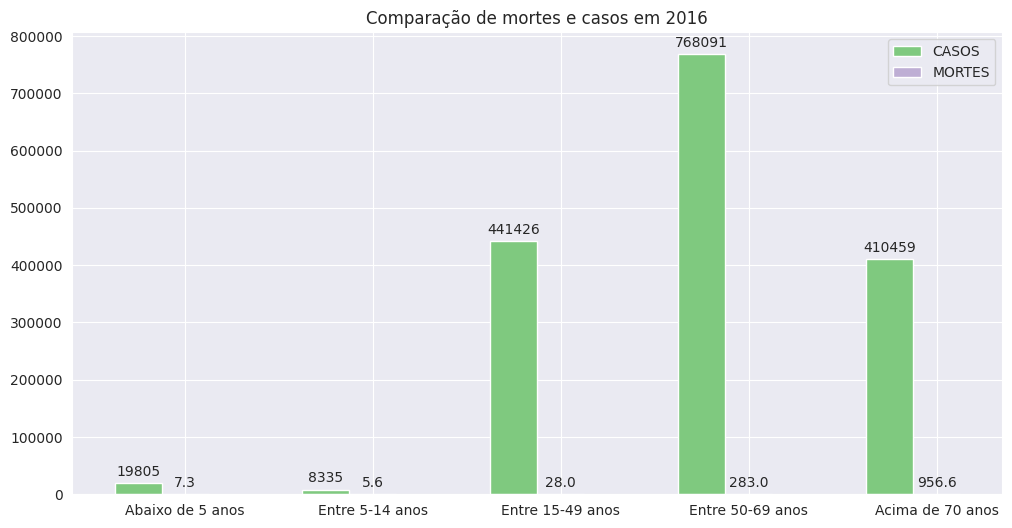

In [ ]:
dados = {'valores_mortes': (7.3, 5.6, 28.0, 283.0, 956.6),
              'valores_casos': (19805, 8335, 441426, 768091, 410459)}

monta_grafico(dados['valores_mortes'], dados['valores_casos'], 'Comparação de mortes e casos em 2016')

No decorrer do ano de 2016, foi observado que o grupo populacional acima dos 70 anos apresentou o maior índice de casos e óbitos, representando 23% do total. Em relação ao ano de 2015, constatou-se uma redução de 1% na proporção dessa faixa etária. Por outro lado, destaca-se o grupo composto por indivíduos entre 15 e 49 anos, o qual exibiu a menor proporção de óbitos, com apenas 1%. Essa disparidade ressalta a significativa diferença entre os grupos etários em relação à ocorrência e gravidade dos casos, enfatizando a importância de medidas específicas de cuidado e proteção adaptadas a cada faixa etária. A queda na porcentagem das pessoas acima de 70 anos indica um possível impacto das estratégias implementadas em 2015, sugerindo a eficácia de medidas direcionadas à proteção desse grupo vulnerável.

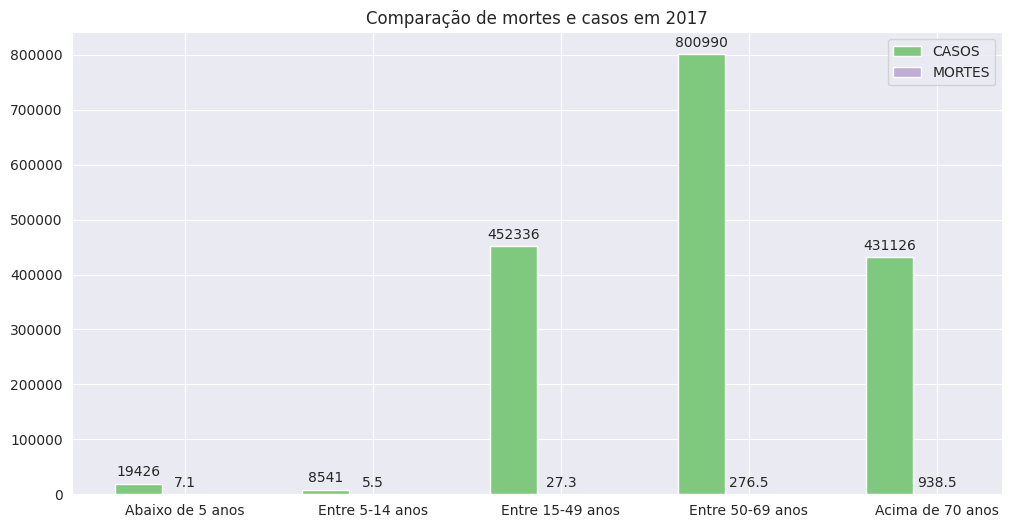

In [ ]:
dados = {'valores_mortes': (7.1, 5.5, 27.3, 276.5, 938.5),
              'valores_casos': (19426, 8541, 452336, 800990, 431126)}

monta_grafico(dados['valores_mortes'], dados['valores_casos'], 'Comparação de mortes e casos em 2017')

No decorrer do período analisado, que compreendeu o ano de 2017, verificou-se que o grupo etário acima dos 70 anos apresentou uma queda de 4% em relação ao primeiro ano analisado, representando agora 22% do total de casos e óbitos. Por outro lado, destaca-se que o grupo composto por indivíduos entre 15 e 49 anos manteve-se constante, com uma proporção de óbitos de apenas 1% ao longo desse período. Essa estabilidade nesse grupo etário ressalta a importância de medidas de proteção e cuidado efetivas que possam ser adotadas para manter essa baixa taxa de mortalidade.

In [ ]:
#criando função para os gráficos da próxima análise
def plotar(titulo, labelx, labely, x, y, xtext_media, ytext_media, media, xtext_min, ytext_min, min, xtext_max, ytext_max, max, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo, fontsize=18)
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14)
  ax = ax
  plt.text(x=xtext_media, y=ytext_media, s=media)
  plt.text(x=xtext_min, y=ytext_min, s=min)
  plt.text(x=xtext_max, y=ytext_max, s=max)

# Gráficos comparando o número de casos de cada faixa etária de 2013-2017

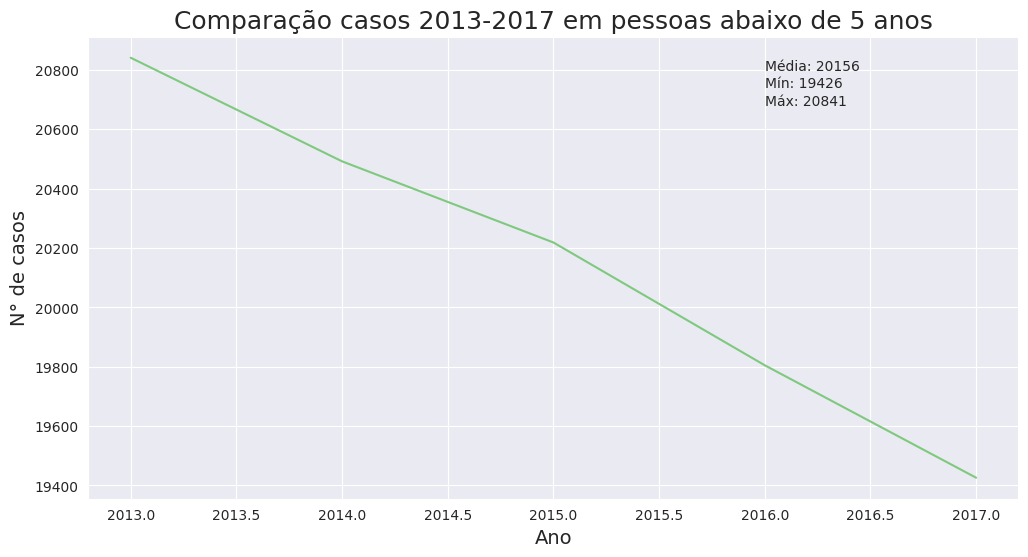

In [ ]:
plotar('Comparação casos 2013-2017 em pessoas abaixo de 5 anos', 'Ano', 'N° de casos', anos, dados_brasil_casos['Abaixo de 5 anos'], 2016.0, 20800, 'Média: %d'%(descricao_um['mean']), 2016.0, 20740, 'Mín: %d'%(descricao_um['min']), 2016.0, 20680, 'Máx: %d'%(descricao_um['max']), dados_brasil_casos)

Foi observada uma diminuição significativa de 6.78% nos casos de neoplasia em crianças com menos de 5 anos de idade.

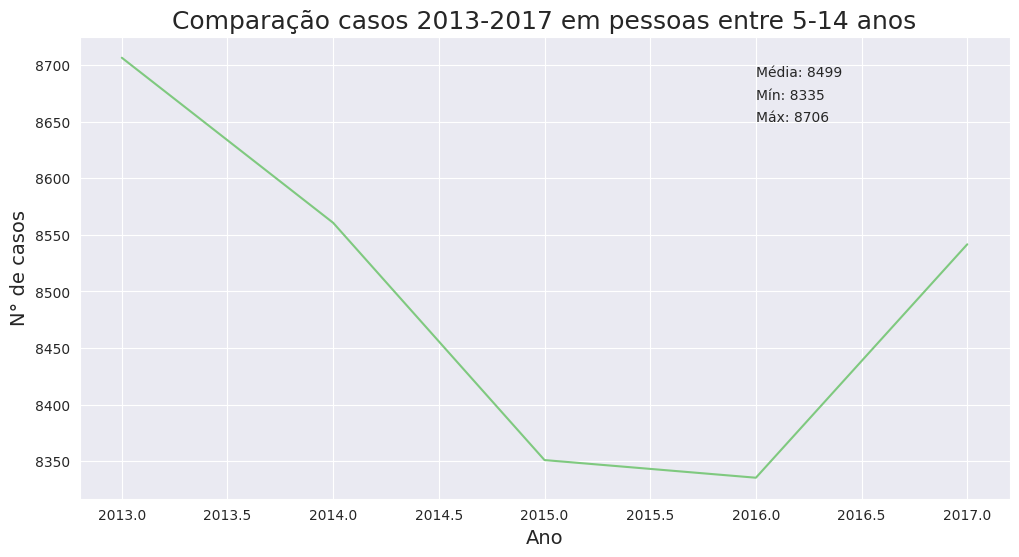

In [ ]:
plotar('Comparação casos 2013-2017 em pessoas entre 5-14 anos', 'Ano', 'N° de casos', anos, dados_brasil_casos['Entre 5-14 anos'], 2016.0, 8690, 'Média: %d'%(descricao_dois['mean']), 2016.0, 8670, 'Mín: %d'%(descricao_dois['min']), 2016.0, 8650, 'Máx: %d'%(descricao_dois['max']), dados_brasil_casos)


A faixa etária entre 5 e 14 anos foi marcada por flutuações nos casos de neoplasia durante o período analisado. Inicialmente, em 2015, houve um decréscimo significativo de 4.0%, seguido por uma diminuição adicional de 0.19% em 2016. Essas reduções iniciais indicam progresso na saúde dessa faixa etária e podem ser atribuídas aos avanços nos métodos de prevenção e tratamento. No entanto, entre 2016 e 2017, ocorreu um aumento de 2.41% nos casos de neoplasia nesse grupo.

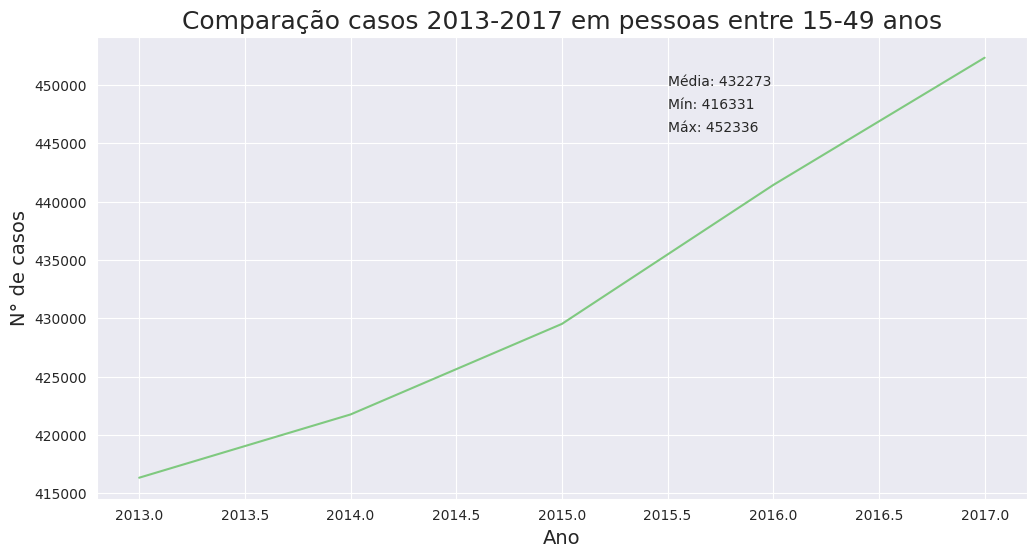

In [ ]:
plotar('Comparação casos 2013-2017 em pessoas entre 15-49 anos', 'Ano', 'N° de casos', anos, dados_brasil_casos['Entre 15-49 anos'], 2015.5, 450000, 'Média: %d'%(descricao_tres['mean']), 2015.5, 448000, 'Mín: %d'%(descricao_tres['min']), 2015.5, 446000, 'Máx: %d'%(descricao_tres['max']), dados_brasil_casos)


Durante o período de análise investigado, houve um crescimento significativo de 7.96% nos casos de neoplasia na faixa etária entre 15 e 49 anos.

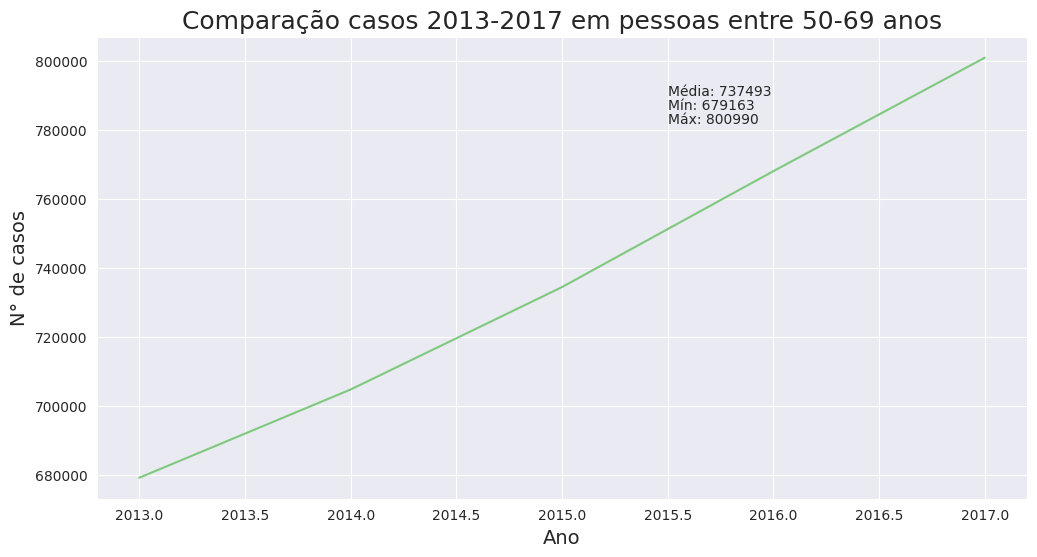

In [ ]:
plotar('Comparação casos 2013-2017 em pessoas entre 50-69 anos', 'Ano', 'N° de casos', anos, dados_brasil_casos['Entre 50-69 anos'], 2015.5, 790000,'Média: %d'%(descricao_quatro['mean']), 2015.5, 786000, 'Mín: %d'%(descricao_quatro['min']), 2015.5, 782000, 'Máx: %d'%(descricao_quatro['max']), dados_brasil_casos)

Em decorrência das observações realizadas, houve um alarmante aumento de 15.2% nos casos de neoplasia entre as idades de 50 e 69 anos.

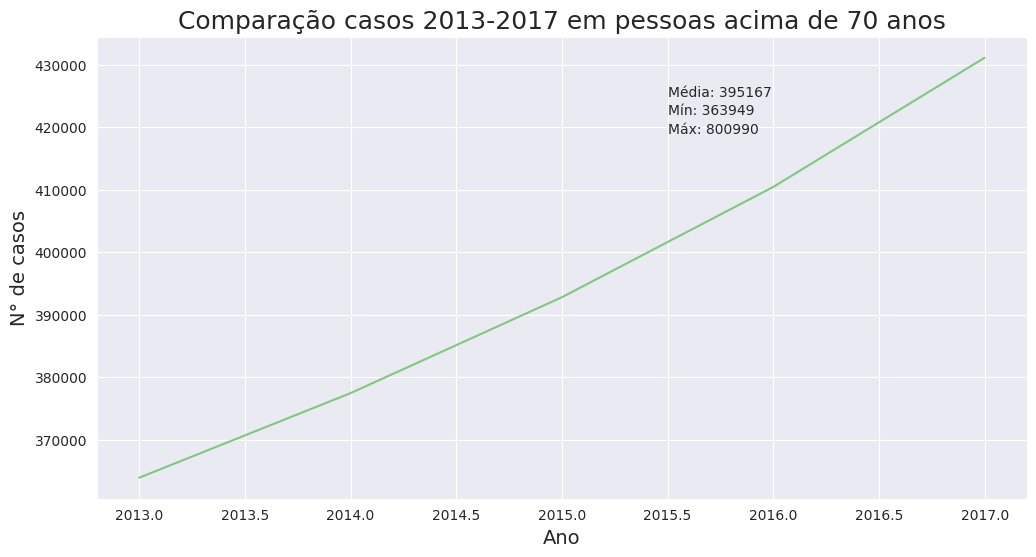

In [ ]:
plotar('Comparação casos 2013-2017 em pessoas acima de 70 anos', 'Ano', 'N° de casos', anos, dados_brasil_casos['Acima de 70 anos'], 2015.5, 425000, 'Média: %d'%(descricao_cinco['mean']), 2015.5, 422000, 'Mín: %d'%(descricao_cinco['min']), 2015.5, 419000, 'Máx: %d'%(descricao_quatro['max']), dados_brasil_casos)

Durante a análise do período, foi constatado um notável incremento de 15.6% nos registros de neoplasia em pessoas com idade superior a 70 anos.

# Relatório Final

Analisando as informações é possível perceber uma correlação sobre a temática aos longos dos anos, podemos afirmar que:

- Em relação a quantidade total de casos no período analisado, os óbitos representam apenas 0,08%;
-	Os obítos entre pessoas de 0 a 14 anos representam 10,64% em relação aos casos;
-	Pessoas 70+ representam a maior porcentagem de obítos: 24,17%;
-	Em 2013 tivemos a maior taxa de morte do período analisado, 26% de obítos entre pessoas 70+;
-	Porém ao decorrer dos anos tivemos uma baixa de 4% de mortes com o mesmo grupo dentro do período analisado;
-	Por consequência o maior número de óbitos se concentra em 2013 tendo 9% no total;
-	E no ano de 2017 tivemos recordes em baixa de morte, saindo de uma média de 9% no ano de 2013 para 7%.

Concluímos que a neoplasia traz mais riscos em pessoas entre 0 a 14 anos e pessoas acima de 70 anos. Podemos avaliar isso devido a quantidade de casos/mortes entre pessoas 15 a 69 anos, pois dentro do período de 2013 a 2017 esse grupo de pessoas tiveram uma taxa somada de 4,8% de casos e óbitos, obtendo assim, a menor porcentagem. Também vale ressaltar que o tratamento para essa enfermidade abre muitas brechas no sistema imunológico do paciente, com isso deixando-o mais vulnerável. O risco ao público listado é coerente pois pessoas entre 0 a 14 anos estão com o sistema imunológico em formação e as acima de 70 de anos estão com a imunidade debilitada devido a idade avançada e qualquer brecha na saúde pode trazer risco. Nossa orientação é que as pessoas façam acompanhamento preventivo, pois mesmo que descubram a neoplasia o risco não é tão elevado quanto uma descoberta tardia.

# Referências Bibliográficas

Belayet Hossain. (2023). <i>Cancer and Deaths Dataset : 1990~2019 Globally</i> [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/5063467

Waskom, M. et al., 2017. mwaskom/seaborn: v0.8.1 (September 2017), Zenodo. Disponível em: https://doi.org/10.5281/zenodo.883859.

Hunter, J.D., 2007. Matplotlib: A 2D graphics environment. Computing in science &amp; engineering, 9(3), pp.90–95. https://matplotlib.org/

McKinney, W. & others, 2010. Data structures for statistical computing in python. In Proceedings of the 9th Python in Science Conference. pp. 51–56. https://pandas.pydata.org/

Harris, C.R. et al., 2020. Array programming with NumPy. Nature, 585, pp.357–362. https://numpy.org/